## IONQ Probablity Correction Experiment

Installation: https://ionq.com/docs/get-started-with-qiskit
Console: https://cloud.ionq.com/jobs


In [1]:
import numpy as np
from qiskit import *
from qiskit.providers.fake_provider import FakeMelbourne
from qiskit.visualization import plot_histogram
import mthree
from time import time
from qiskit_ionq import *

Experiment setup. Need an accces token for this. SWee https://ionq.com/docs/get-started-with-qiskit

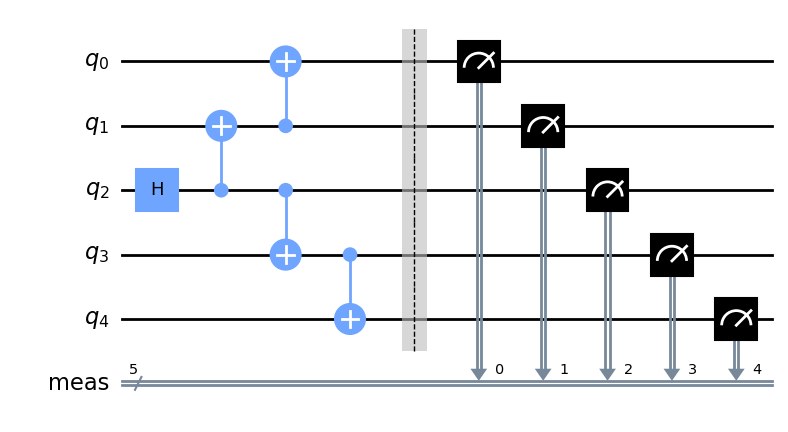

In [2]:
# Setup experiment
token = 'YOUR-TOKEN'
provider = IonQProvider(token)

backend = provider.get_backend("ionq_simulator")

qc = QuantumCircuit(5)
qc.h(2)
qc.cx(2,1)
qc.cx(1,0)
qc.cx(2,3)
qc.cx(3,4)
qc.measure_all()
qc.draw('mpl')

Trick to run with noise. Note: right now IonQ/Qiskit does not accept noise models.
* Update the file Lib\site-packages\qiskit_ionq\ionq_backend.py line 315 (below def _default_options)
* Set the noise model to noise_model='aria-1'

In [10]:
# run experiment
shots=4096

# Noise model: don't work here. See https://ionq.com/docs/get-started-with-hardware-noise-model-simulation
job = backend.run(qc, shots=shots) # Doesn't work :(  noise_model='aria-1'

# Print the counts
raw_counts = job.get_counts()

# The simulator provides the ideal probabilities from the circuit, and the provider
# creates counts by randomly sampling from these probabilities. The raw (true)
# probabilities are also accessible by calling get_probabilities():
probs = job.get_probabilities()
#print (probs)


In [11]:
# Filter mitgation
import mitigation as mitigation

start       = time()
in_range = (0.03, 0.97) # 'image' 
counts1 = mitigation.get_counts(raw_counts, shots, in_range=in_range)
end        = time()

print(f'Filter mitigation at 3% execution time (ms): {(end - start)*1000:.2f}')

Filter mitigation at 3% execution time (ms): 0.00


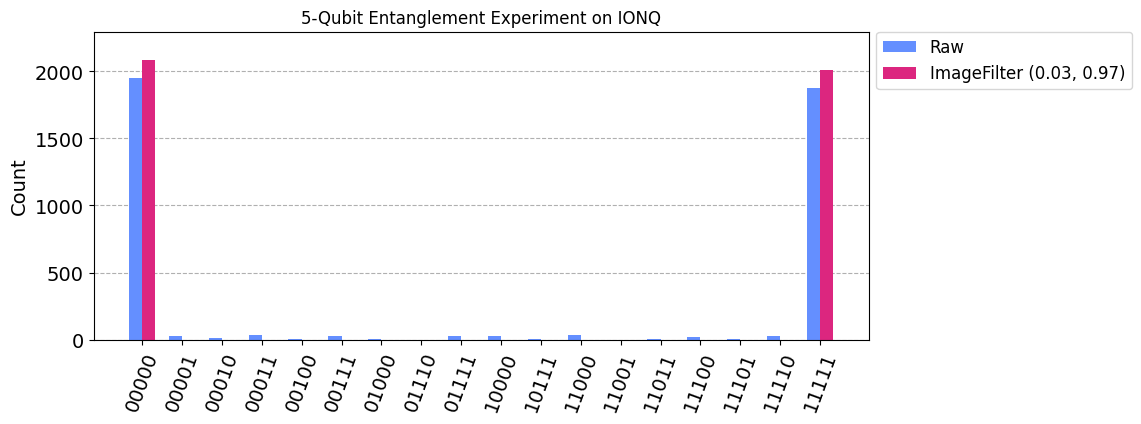

In [15]:
# Plot
plot_histogram([raw_counts, counts1], figsize=(10,4), legend=['Raw', 'ImageFilter ' + str(in_range)]
               , bar_labels=False, title='5-Qubit Entanglement Experiment on IONQ')
